In [1]:
import networkx as nx
import math
import random

In [2]:
#nx.test()

In [3]:
with open('/Users/florian/Documents/ETUDES/Etudes Post-Prepa/4. ESSEC MSc DSBA/T2/5. Networks/assignment1 code/ca-GrQc.txt') as f:
    lines = f.readlines()
myList = [line.strip().split() for line in lines]
# to remove useless text of the file, following :
del myList[0]
del myList[0]
del myList[0]
del myList[0]
#myList

In [4]:
g = nx.Graph()
g.add_edges_from(myList)

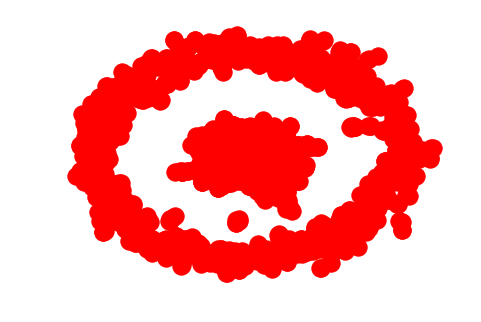

In [82]:
# Drawing total graph
nx.draw(g)

## Question 7 (a) - (1), (2)

In [13]:
V=len(g.nodes())
E=len(g.edges())
print '(1)'
print 'Number of nodes:', V
print 'Number of edges:', E
print '-----------'
print '(2)'
print 'Is the graph connected? ==>',nx.is_connected(g)
print '(2)(i)'
print 'Number of connected components (CCs)', nx.number_connected_components(g)


 (1)
Number of nodes: 5242
Number of edges: 14490
-----------
(2)
Is the graph connected? ==> False
(2)(i)
Number of connected components (CCs) 355


In [14]:
list_of_components = sorted(nx.connected_components(g), key = len, reverse=True)

# count the number of components for each size
def values_distribution_of_components(numerical_list):
    numerical_list = sorted(numerical_list)
    dico = {}
    for i in numerical_list:
        if len(i) not in dico:
            dico[len(i)] = 1
        else:
            dico[len(i)] += 1
    return(dico)

sizes_dico = values_distribution_of_components(list_of_components)
sizes_dico

{1: 1,
 2: 177,
 3: 98,
 4: 30,
 5: 17,
 6: 12,
 7: 8,
 8: 6,
 9: 2,
 10: 1,
 12: 1,
 14: 1,
 4158: 1}

(2)(ii)


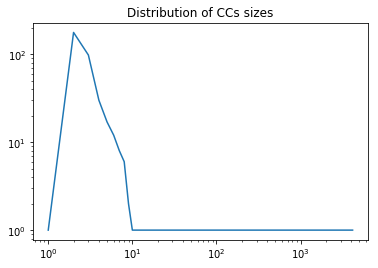

In [15]:
print '(2)(ii)'
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(*zip(*sorted(sizes_dico.items())))
plt.xscale('log')
plt.yscale('log')
plt.title('Distribution of CCs sizes')
plt.show()

In [17]:
GCC = max(nx.connected_component_subgraphs(g),key=len)
GCC_nodes=len(GCC.nodes())
GCC_edges=len(GCC.edges())

print 'The largest connected component (GCC) has', GCC_nodes,'nodes and', GCC_edges, 'edges.'
print 'This represents', round(float(GCC_nodes)/V*100,2), '% of total nodes and' , round(float(GCC_edges)/E*100,2),'% of total edges.'
print 'This GCC is so really important!! It has relatevely more edges than nodes, this means the others CCs might be very isolated.'

The largest connected component (GCC) has 4158 nodes and 13425 edges.
This represents 79.32 % of total nodes and 92.65 % of total edges.
This GCC is so really important!! It has relatevely more edges than nodes, this means the others CCs might be very isolated.


## Question 7 (b)


In [18]:
import numpy as np
degrees=dict(GCC.degree())
degrees_list=sorted(degrees.values())
print 'Max degree of the nodes of the graph:', np.max(degrees_list)
print 'Min degree of the nodes of the graph:', np.min(degrees_list)
print 'Median degree of the nodes of the graph:', np.median(degrees_list)
print 'Mean degree of the nodes of the graph:', np.mean(degrees_list)
print '-----'
print 'Considering the min and median degree, we can conclude there are many nodes isolated as leaves of a tree.'

Max degree of the nodes of the graph: 81
Min degree of the nodes of the graph: 1
Median degree of the nodes of the graph: 3.0
Mean degree of the nodes of the graph: 6.45887445887
-----
Considering the min and median degree, we can conclude there are many nodes isolated as leaves of a tree.


In [32]:
# get the number of nodes with same degree
degrees_list = degrees.values()

degrees_distribution_dico = {}
for i in degrees_list:
    if i not in degrees_distribution_dico:
        degrees_distribution_dico[i] = 1
    else:
        degrees_distribution_dico[i] += 1
#degrees_distribution_dico  

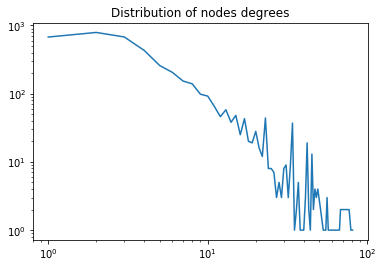

In [33]:
# and plot it
plt.plot(*zip(*sorted(degrees_distribution_dico.items())))
plt.xscale('log')
plt.yscale('log')
plt.title('Distribution of nodes degrees')
plt.show()

## Question 7 (c)


### Question 7 (c) (1)

In [34]:
# for each node get its triangle participation
nodes_participation = nx.triangles(GCC)
# derive the number of triangles
nbr_triangles_GCC = sum(list(nodes_participation.values()))/3
print 'The total number of triangles in the GCC of the network is', nbr_triangles_GCC

The total number of triangles in the GCC of the network is 47779


### Question 7 (c) (2)

In [35]:
# count the number of nodes having same triangle participation
triangles_participation_distribution = {}
for key, value in nodes_participation.iteritems():
    if value not in triangles_participation_distribution:
        triangles_participation_distribution[value] = 1
    else:
        triangles_participation_distribution[value] += 1

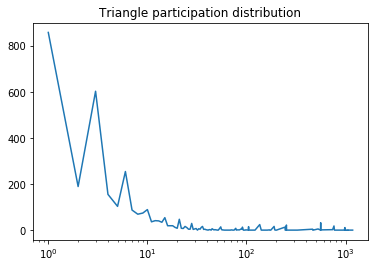

In [36]:
plt.plot(*zip(*sorted(triangles_participation_distribution.items())))
plt.xscale('log')
plt.title('Triangle participation distribution')
plt.show()

## Question 7 (d)


Computing the whole spectrum of the adjacency matrix can be a computational bottleneck because the underlying algorithm complexity is at least $O(n^2)$ or $O(n^3)$

In [37]:
from numpy import linalg as LA

#Generating adjacency matrix 
GCC_adj_matrix = nx.to_numpy_matrix(GCC)

#Isolating eigen_values
sorted_eigen_values = LA.eigvals(GCC_adj_matrix).real

In [38]:
sorted_eigen_values

array([ 45.61666218,  38.12196449,  34.00715914, ...,  -1.        ,
        -1.        ,  -1.        ])

In [39]:
#Raising the eigenvalues to power of 3
power_3_eigen = [number**3 for number in sorted_eigen_values]
nbr_triangles_GCC_eig_total = sum(power_3_eigen)/6
nbr_triangles_GCC_eig_total

47808.500000000997

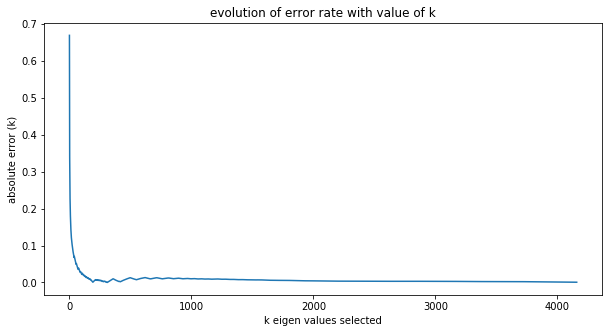

In [40]:
#Error calculator
def error_calculator(k):
    prediction = sum(power_3_eigen[0:k]) / 6
    error = abs((prediction - nbr_triangles_GCC)/nbr_triangles_GCC)
    return error

#Calculating the errors
error_dico={}
for k in range(1,4159):
    error_dico[k] = error_calculator(k)

#plotting the evolution of the error
plt.figure(figsize=(10,5))
plt.plot(*zip(*sorted(error_dico.items())))
plt.xlabel("k eigen values selected")
plt.ylabel("absolute error (k)")
plt.title("evolution of error rate with value of k")
plt.show()

## Question 8
Erdos-Renyi random graph $G_{n,p}$

In [41]:
n = 1000
p = 0.009
GERR=nx.fast_gnp_random_graph(n,p)
theor_mean_degree_GERR=(n-1)*p

### Question 8 (a)

In [42]:
print 'The mean degree of the graph is', theor_mean_degree_GERR

The mean degree of the graph is 8.991


The mean degree formula being : $
c=<k>=\sum_{m=0}^{\binom{n}{2}}\frac{2m}{n}Pr(m)=\frac2n \binom{n}{2} p = (n-1)p
$

### Question 8 (b)

In [43]:
print 'Is the graph connected? ==>',nx.is_connected(GERR)

Is the graph connected? ==> True


A random graph is connected  if its mean degree $c$ is higher than $ln(n) $. Which is indeed the case here.

In [44]:
theor_mean_degree_GERR > math.log(1000) 

True

### Question 8 (c)

In [47]:
dict_degrees_GERR=dict(GERR.degree())
list_degrees_GERR=dict_degrees_GERR.values()
print 'Mean degree of the nodes of the GERR:', np.mean(list_degrees_GERR)

Mean degree of the nodes of the GERR: 8.992


In [49]:
dict_degrees_GERR=dict(GERR.degree())
list_degrees_GERR=sorted(dict_degrees_GERR.values())

dico_degrees_distribution_GERR={}
for i in list_degrees_GERR:
    if i not in dico_degrees_distribution_GERR:
        dico_degrees_distribution_GERR[i]=1
    else:
        dico_degrees_distribution_GERR[i]+=1
#dico_degrees_distribution_GERR

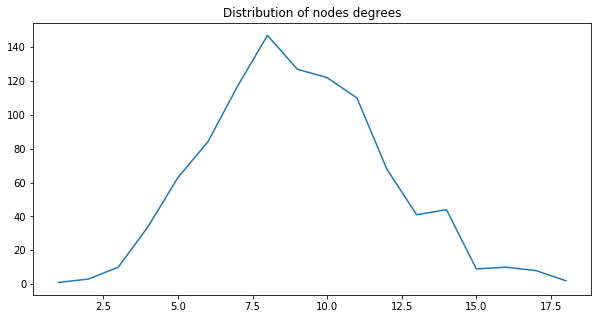

In [51]:
plt.figure(figsize=(10,5))
plt.plot(*zip(*sorted(dico_degrees_distribution_GERR.items())))
plt.title('Distribution of nodes degrees')
plt.show()

## Question 9


### (a) (i)
The produced Kronecker graph is connected, if: 
$$ \boxed{b+c> 1}$$
Here $b+c=0.26+0.53=0.79$ . So the produced Kronecker graph is NOT connected. <br><br>
The graph has a giant connected component of size $\Theta(n)$ if:
$$\boxed{(a+b)(b+c) > 1}$$
Here $(a+b)(b+c)=(0.99+0.26)(0.26+0.53)=0.9875$ . So the produced Kronecker graph is NOT connected.

### (b)

Similar structural properties : 
- Global aspect of networks : nodes + edges
- Triangle participation distribution


In [77]:
import numpy as np
A=np.asarray([[0.99, 0.26],[ 0.26, 0.53]])
B=np.kron(A,A)
for i in range(11):
    B=np.kron(B,A)
B

array([[  8.77521023e-01,   2.30460067e-01,   2.30460067e-01, ...,
          9.44746671e-08,   9.44746671e-08,   2.48115287e-08],
       [  2.30460067e-01,   4.69783982e-01,   6.05248660e-02, ...,
          1.92582975e-07,   2.48115287e-08,   5.05773470e-08],
       [  2.30460067e-01,   6.05248660e-02,   4.69783982e-01, ...,
          2.48115287e-08,   1.92582975e-07,   5.05773470e-08],
       ..., 
       [  9.44746671e-08,   1.92582975e-07,   2.48115287e-08, ...,
          4.86346315e-04,   6.26586829e-05,   1.27727315e-04],
       [  9.44746671e-08,   2.48115287e-08,   1.92582975e-07, ...,
          6.26586829e-05,   4.86346315e-04,   1.27727315e-04],
       [  2.48115287e-08,   5.05773470e-08,   5.05773470e-08, ...,
          1.27727315e-04,   1.27727315e-04,   2.60367219e-04]])

In [78]:
GCC_K = nx.Graph() 
nodes = []
edges = []
kron_binary = B
for i in range(0,B.shape[0]):
    for j in range(0,B.shape[1]): 
        rand_num = np.random.uniform(0,1)
        if B[i][j]>rand_num:
            kron_binary[i][j]=1 
        else:
            kron_binary[i][j]=0
GCC_K = nx.from_numpy_matrix(kron_binary)

### Global aspect of networks : nodes + edges


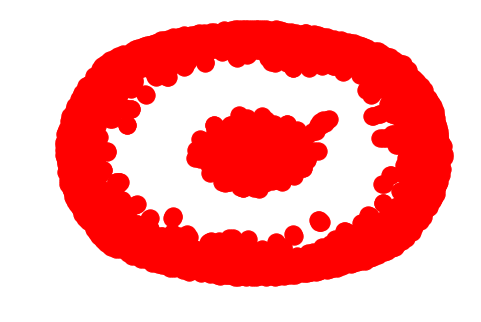

In [80]:
# plotting the graph and discovering similarity of shapes
## Kronecker graph
nx.draw(GCC_K)

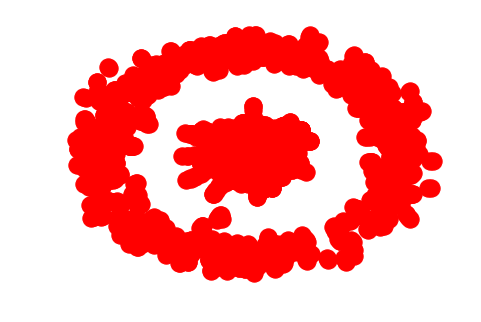

In [84]:
## Graph CA-GrQc
nx.draw(g)

### Triangle participation distribution


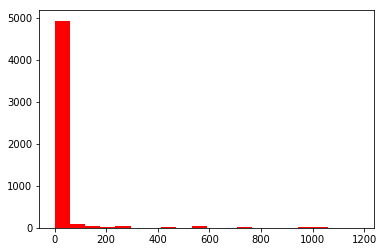

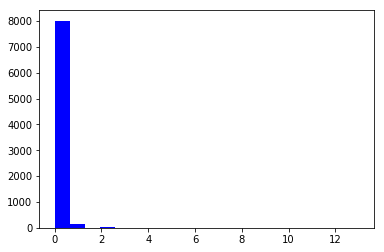

In [88]:
triangle_sequences = list(nx.triangles(g).values()) 
triangle_sequences_K = list(nx.triangles(GCC_K).values())
plt.hist(triangle_sequences,bins=20,color='red',label='Triangle participation distribution of Kronecker Graph')
plt.show()
plt.hist(triangle_sequences_K,bins=20, color='blue', label='Triangle participation distribution of Initial Graph')
plt.show()

## Question 10
(i) Random deletion: delete a randomly selected node. <br>
(ii) Targeted deletion: delete a node chosen among the ones with the highest degree in the network.

### 1. Setting the relevant functions

In [54]:
#import math
#import random

# Get the numbers of nodes to remove from a graph based on the fraction of nodes we want to remove
def calculate_number_of_nodes_to_remove(graph,fraction_to_remove=0.1):
    number_of_nodes = len(graph.nodes())
    result = int(math.floor(number_of_nodes*fraction_to_remove))
    return result

# Remove a specific number of nodes with RANDOM deletion
def remove_random_nodes(graph,number): 
    #import random
    list_of_nodes = graph.nodes()
    # get a list of random nodes
    random_sample_to_remove = random.sample(list_of_nodes, number)
    # remove them from graph
    graph.remove_nodes_from(random_sample_to_remove)
    return graph

# Remove a specific number of nodes with TARGETED deletion
def remove_targeted_nodes(graph,number): #highest degree nodes
    my_dico_graph = dict(graph.degree())
    my_nodes_by_degree = sorted(my_dico_graph,key=lambda x: my_dico_graph[x], reverse=True)
    # get the list of nodes sorted by degree descending
    targeted_sample_to_remove = my_nodes_by_degree[:number]
    # remove them from graph
    graph.remove_nodes_from(targeted_sample_to_remove)
    return graph

# Get the size of GCC and the size of the rest components :
#     - for a specific graph, 
#     - after having removed specific number of nodes
#     - with specific deletion (random or targeted)

def calculate_new_sizes_GCC_and_Rest_Components(graph,removeMethod,numberOfNodesToRemove):
        my_list_CC = []
        # remove nodes
        graph = removeMethod(graph,numberOfNodesToRemove)
        size_graph = len(graph.nodes())
        # list all CC of graphs
        my_list_CC = list(nx.connected_component_subgraphs(graph))
        # find GCC of the graph and its size
        graph_GCC = max(my_list_CC,key=len)
        size_GCC = len(graph_GCC.nodes())
        # remove GCC of the graph
        my_list_CC.remove(graph_GCC)
        # find size of the rest components : 
        size_Rest_Components = size_graph - size_GCC
        return size_GCC,size_Rest_Components

In [55]:
#Example
H = GCC.copy()
total_Nodes_ex = len(H.nodes())
i = 20
size_GCC_ex,size_RC_ex = calculate_new_sizes_GCC_and_Rest_Components(H,remove_targeted_nodes,i)

print 'The graph has initially',total_Nodes_ex , 'nodes.'
print 'For', i, 'nodes to remove:'
print '- the new GCC has a size of', size_GCC_ex
print '- and the rest components have a total size of', size_RC_ex

print 'We can verify that we have:',i,'+',size_GCC_ex,'+',size_RC_ex,'=',i+size_GCC_ex+size_RC_ex

The graph has initially 4158 nodes.
For 20 nodes to remove:
- the new GCC has a size of 4108
- and the rest components have a total size of 30
We can verify that we have: 20 + 4108 + 30 = 4158


In [59]:
# collect the size of GCC and the size of the rest components while removing nodes in a range
def build_Dico_GCC_and_Dico_Rest_Components(H,remove_method,number_of_nodes_to_remove):
    my_Dico_GCC={}
    my_Dico_Rest_Components={}
    for k in range(0,number_of_nodes_to_remove+1):
        H=GCC.copy()
        print k
        my_Dico_GCC[k],my_Dico_Rest_Components[k]=calculate_new_sizes_GCC_and_Rest_Components(H,remove_method,k)
    return my_Dico_GCC, my_Dico_Rest_Components

### 2. Setting the parameters

In [60]:
H=GCC.copy()
fraction_to_remove = 0.20
number_of_nodes_to_remove = calculate_number_of_nodes_to_remove(H,fraction_to_remove)
print 'We set the number of nodes to remove to:',number_of_nodes_to_remove

We set the number of nodes to remove to: 831


### 3. Executing/Calculation 

In [61]:
# dictionnaries for Random deletion
dico_GCC_targeted, dico_RC_targeted = build_Dico_GCC_and_Dico_Rest_Components(H,remove_targeted_nodes,number_of_nodes_to_remove)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [62]:
# dictionnaries for Targeted deletion
dico_GCC_random, dico_RC_random = build_Dico_GCC_and_Dico_Rest_Components(H,remove_random_nodes,number_of_nodes_to_remove)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### 4. Plotting 

In [63]:
X_GGC_Targeted = np.asarray(dico_GCC_targeted.keys())/4158.0
X_GGC_Random = np.asarray(dico_GCC_random.keys())/4158.0
X_RC_Targeted = np.asarray(dico_RC_targeted.keys())/4158.0
X_RC_Random = np.asarray(dico_RC_random.keys())/4158.0

Y_GGC_Targeted = np.asarray(dico_GCC_targeted.values())
Y_GGC_Random = np.asarray(dico_GCC_random.values())
Y_RC_Targeted = np.asarray(dico_RC_targeted.values())
Y_RC_Random = np.asarray(dico_RC_random.values())

Text(0.5,1,u'GCC and rest components sizes vs. the fraction of deleted nodes, for random or targeted strategies')

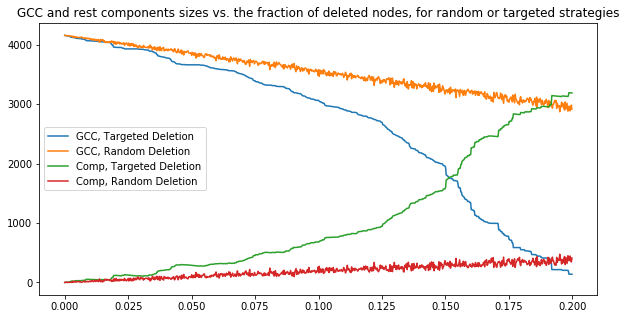

In [64]:
plt.figure(figsize=(10,5))
plt.plot(X_GGC_Targeted, Y_GGC_Targeted,label='GCC, Targeted Deletion')
plt.plot(X_GGC_Random, Y_GGC_Random,label='GCC, Random Deletion')
plt.plot(X_RC_Targeted, Y_RC_Targeted,label='Comp, Targeted Deletion')
plt.plot(X_RC_Random, Y_RC_Random,label='Comp, Random Deletion')
plt.legend()
plt.title('GCC and rest components sizes vs. the fraction of deleted nodes, for random or targeted strategies')